In [55]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import joblib
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

#Import SimpleImputer
from sklearn.impute import SimpleImputer

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import LightGBM Classifier
# Import XGBoost Classifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


#Logistic Regression
from sklearn.linear_model import LogisticRegression

## Data selection

In [5]:
import os
os.getcwd()
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'ny_crimes_cl_data.csv',
 'cm_random_forest.pdf',
 'sample_data']

In [6]:
%%time
# Import the data
# df = pd.read_csv('/Users/poorna/Downloads/train_data.csv')
df = pd.read_csv('ny_crimes_cl_data.csv')
print(df.info())
# Convert the Event time and category of the crime to a more representatble data.
df.LAW_CAT_CD = df['CRIME_CLASS'].replace(['FELONY','MISDEMEANOR',"VIOLATION"],[2,1,0])

<timed exec>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759061 entries, 0 to 4759060
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   year               int64  
 2   month              int64  
 3   day                int64  
 4   weekday            object 
 5   hour               int64  
 6   Latitude           float64
 7   Longitude          float64
 8   CRM_ATPT_CPTD_CD   object 
 9   OFNS_DESC          object 
 10  ADDR_PCT_CD        float64
 11  CRIME_CLASS        object 
 12  BORO_NM            object 
 13  PREM_TYP_DESC      object 
 14  IN_PARK            float64
 15  IN_PUBLIC_HOUSING  float64
 16  IN_STATION         float64
 17  SUSP_AGE_GROUP     object 
 18  SUSP_RACE          object 
 19  SUSP_SEX           object 
 20  VIC_AGE_GROUP      object 
 21  VIC_RACE           object 
 22  VIC_SEX            object 
dtypes: float64(6), int64(4), object(13)
memory usage: 835.1+ MB
None
CPU times: user 2

<timed exec>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [7]:
df.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,CRM_ATPT_CPTD_CD,OFNS_DESC,...,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,10361314,2006,2,11,Saturday,16,40.689001,-73.945027,COMPLETED,ASSAULT 3 & RELATED OFFENSES,...,STREET,1.0,1.0,1.0,UNKNOWN,(null),(null),45-64,BLACK,F
1,10363948,2006,2,11,Saturday,17,40.698474,-73.917769,COMPLETED,HARRASSMENT 2,...,STREET,1.0,1.0,1.0,18-24,BLACK,M,18-24,BLACK,F
2,16719307,2006,2,15,Wednesday,0,40.869470,-73.879861,COMPLETED,RAPE,...,(null),1.0,1.0,1.0,UNKNOWN,(null),(null),<18,BLACK,F
3,16939015,2006,5,30,Tuesday,19,40.837842,-73.919628,COMPLETED,RAPE,...,HOTEL/MOTEL,1.0,1.0,1.0,18-24,UNKNOWN,M,<18,BLACK,F
4,27139650,2006,12,15,Friday,21,40.698474,-73.917769,COMPLETED,ARSON,...,OTHER,1.0,1.0,1.0,UNKNOWN,(null),(null),UNKNOWN,UNKNOWN,M


In [8]:
# Count the number of row in each category
df.LAW_CAT_CD.value_counts().sort_values(ascending=False)

1    2735614
2    1451297
0     572150
Name: CRIME_CLASS, dtype: int64

In [9]:
# # As the data is not balanced, we want create a new balanced dataset that contains 817326 row of each class
# zero,one,two = [],[],[]
# zero_c,one_c,two_c = 0,0,0
# for i in tqdm(df.iterrows()):
#     if i[1].LAW_CAT_CD == 0 and zero_c <= 817326:
#         zero.append(i[1].values)
#         zero_c += 1
#     elif i[1].LAW_CAT_CD == 1 and one_c <= 817326:
#         one.append(i[1].values)
#         one_c += 1
#     elif i[1].LAW_CAT_CD == 2 and two_c <= 817326:
#         two.append(i[1].values)
#         two_c += 1
#     if zero_c == 817326 and one_c == 817326 and two_c == 817326:
#         break
# zero_df = pd.DataFrame(zero, columns=df.columns.values.tolist())
# one_df = pd.DataFrame(one, columns=df.columns.values.tolist())
# two_df = pd.DataFrame(two, columns=df.columns.values.tolist())
# final_df = pd.concat([zero_df,one_df,two_df])
# final_df.to_csv("./ny_clean_train_balanced.csv",index=False)

### Import the balanced dataset

In [10]:
# # Import the data
# df = pd.read_csv('./ny_clean_train_balanced.csv')

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759061 entries, 0 to 4759060
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   year               int64  
 2   month              int64  
 3   day                int64  
 4   weekday            object 
 5   hour               int64  
 6   Latitude           float64
 7   Longitude          float64
 8   CRM_ATPT_CPTD_CD   object 
 9   OFNS_DESC          object 
 10  ADDR_PCT_CD        float64
 11  CRIME_CLASS        object 
 12  BORO_NM            object 
 13  PREM_TYP_DESC      object 
 14  IN_PARK            float64
 15  IN_PUBLIC_HOUSING  float64
 16  IN_STATION         float64
 17  SUSP_AGE_GROUP     object 
 18  SUSP_RACE          object 
 19  SUSP_SEX           object 
 20  VIC_AGE_GROUP      object 
 21  VIC_RACE           object 
 22  VIC_SEX            object 
dtypes: float64(6), int64(4), object(13)
memory usage: 835.1+ MB


,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,CRM_ATPT_CPTD_CD,OFNS_DESC,...,PREM_TYP_DESC,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,10361314,2006,2,11,Saturday,16,40.689001,-73.945027,COMPLETED,ASSAULT 3 & RELATED OFFENSES,...,STREET,1.0,1.0,1.0,UNKNOWN,(null),(null),45-64,BLACK,F
1,10363948,2006,2,11,Saturday,17,40.698474,-73.917769,COMPLETED,HARRASSMENT 2,...,STREET,1.0,1.0,1.0,18-24,BLACK,M,18-24,BLACK,F
2,16719307,2006,2,15,Wednesday,0,40.869470,-73.879861,COMPLETED,RAPE,...,(null),1.0,1.0,1.0,UNKNOWN,(null),(null),<18,BLACK,F
3,16939015,2006,5,30,Tuesday,19,40.837842,-73.919628,COMPLETED,RAPE,...,HOTEL/MOTEL,1.0,1.0,1.0,18-24,UNKNOWN,M,<18,BLACK,F
4,27139650,2006,12,15,Friday,21,40.698474,-73.917769,COMPLETED,ARSON,...,OTHER,1.0,1.0,1.0,UNKNOWN,(null),(null),UNKNOWN,UNKNOWN,M


## Data preparing

### Select only relevant columns


In [13]:
df.columns

Index(['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'Latitude',
       'Longitude', 'CRM_ATPT_CPTD_CD', 'OFNS_DESC', 'ADDR_PCT_CD',
       'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC', 'IN_PARK',
       'IN_PUBLIC_HOUSING', 'IN_STATION', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [14]:
# Set the list of features to include in Machine Learning Model
feature_lst=['hour','ADDR_PCT_CD', 'month', 'day', 'Latitude',
       'Longitude', 'BORO_NM',"weekday",
       'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX']

df_sel=df[feature_lst].copy()
df_sel.info()
df_sel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759061 entries, 0 to 4759060
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   hour               int64  
 1   ADDR_PCT_CD        float64
 2   month              int64  
 3   day                int64  
 4   Latitude           float64
 5   Longitude          float64
 6   BORO_NM            object 
 7   weekday            object 
 8   IN_PARK            float64
 9   IN_PUBLIC_HOUSING  float64
 10  IN_STATION         float64
 11  VIC_AGE_GROUP      object 
 12  VIC_RACE           object 
 13  VIC_SEX            object 
dtypes: float64(6), int64(3), object(5)
memory usage: 508.3+ MB


,hour,ADDR_PCT_CD,month,day,Latitude,Longitude,BORO_NM,weekday,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,16,79.0,2,11,40.689001,-73.945027,BROOKLYN,Saturday,1.0,1.0,1.0,45-64,BLACK,F
1,17,83.0,2,11,40.698474,-73.917769,BROOKLYN,Saturday,1.0,1.0,1.0,18-24,BLACK,F
2,0,52.0,2,15,40.869470,-73.879861,BRONX,Wednesday,1.0,1.0,1.0,<18,BLACK,F
3,19,44.0,5,30,40.837842,-73.919628,BRONX,Tuesday,1.0,1.0,1.0,<18,BLACK,F
4,21,83.0,12,15,40.698474,-73.917769,BROOKLYN,Friday,1.0,1.0,1.0,UNKNOWN,UNKNOWN,M


In [15]:
print(df_sel.shape)
# double check that the data is balanced
#df_sel.CRIME_CLASS.value_counts().sort_values(ascending=False)

(4759061, 14)


<ipython-input-16-a580a6a11444>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sel.corr()


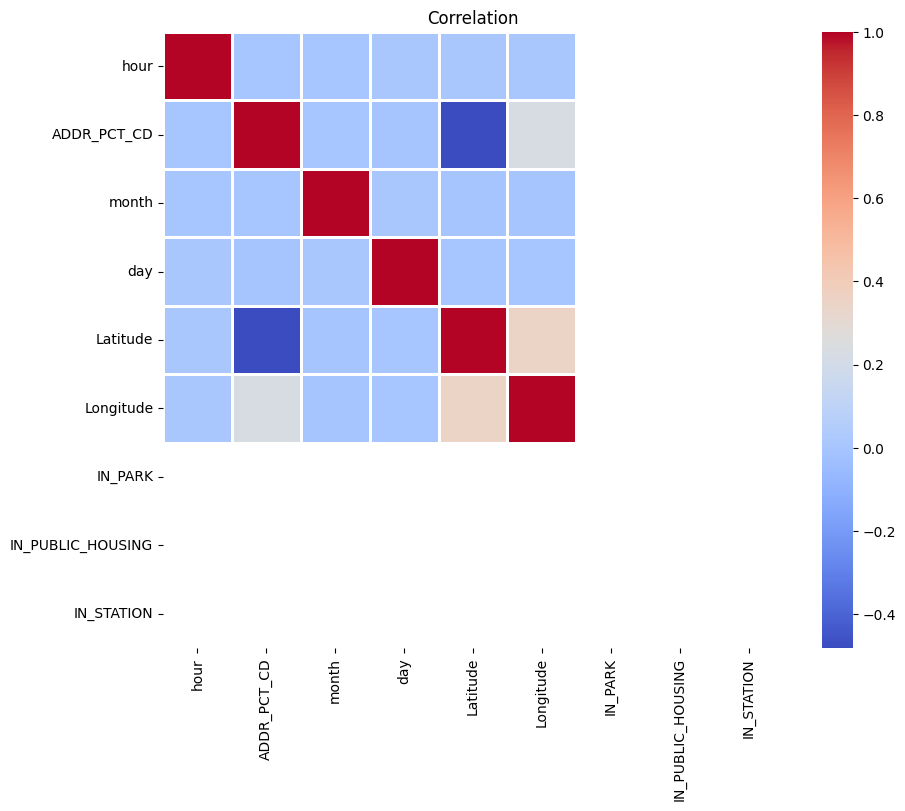

In [16]:
# Draw a corrolation matrix of the variables
corr = df_sel.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

### Deal with categorical data: pd.get_dummies()

In [17]:
# Generate dummies for categorical data
df_state_dummy = pd.get_dummies(df_sel)

df_state_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759061 entries, 0 to 4759060
Data columns (total 43 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   hour                                     int64  
 1   ADDR_PCT_CD                              float64
 2   month                                    int64  
 3   day                                      int64  
 4   Latitude                                 float64
 5   Longitude                                float64
 6   IN_PARK                                  float64
 7   IN_PUBLIC_HOUSING                        float64
 8   IN_STATION                               float64
 9   BORO_NM_(null)                           uint8  
 10  BORO_NM_BRONX                            uint8  
 11  BORO_NM_BROOKLYN                         uint8  
 12  BORO_NM_MANHATT                          uint8  
 13  BORO_NM_MANHATTAN                        uint8  
 14  BORO_NM_QUEENS    

In [18]:
df_state_dummy.head()

,hour,ADDR_PCT_CD,month,day,Latitude,Longitude,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,BORO_NM_(null),...,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_(null),VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M
0,16,79.0,2,11,40.689001,-73.945027,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
1,17,83.0,2,11,40.698474,-73.917769,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,52.0,2,15,40.869470,-73.879861,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
3,19,44.0,5,30,40.837842,-73.919628,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
4,21,83.0,12,15,40.698474,-73.917769,1.0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
df_state_dummy.dtypes

hour                                         int64
ADDR_PCT_CD                                float64
month                                        int64
day                                          int64
Latitude                                   float64
Longitude                                  float64
IN_PARK                                    float64
IN_PUBLIC_HOUSING                          float64
IN_STATION                                 float64
BORO_NM_(null)                               uint8
BORO_NM_BRONX                                uint8
BORO_NM_BROOKLYN                             uint8
BORO_NM_MANHATT                              uint8
BORO_NM_MANHATTAN                            uint8
BORO_NM_QUEENS                               uint8
BORO_NM_STATEN ISLAND                        uint8
weekday_Friday                               uint8
weekday_Monday                               uint8
weekday_Saturday                             uint8
weekday_Sunday                 

In [20]:
df_state_dummy = df_state_dummy.astype({'hour':'category'})
df_state_dummy = df_state_dummy.astype({'ADDR_PCT_CD':'category'})
df_state_dummy = df_state_dummy.astype({'month':'category'})
df_state_dummy = df_state_dummy.astype({'day':'category'})
df_state_dummy = df_state_dummy.astype({'IN_PARK':'category'})
df_state_dummy = df_state_dummy.astype({'IN_PUBLIC_HOUSING':'category'})
df_state_dummy = df_state_dummy.astype({'IN_STATION':'category'})
df_state_dummy.head()

,hour,ADDR_PCT_CD,month,day,Latitude,Longitude,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,BORO_NM_(null),...,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_(null),VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M
0,16,79.0,2,11,40.689001,-73.945027,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
1,17,83.0,2,11,40.698474,-73.917769,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,52.0,2,15,40.869470,-73.879861,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
3,19,44.0,5,30,40.837842,-73.919628,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
4,21,83.0,12,15,40.698474,-73.917769,1.0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
df_state_dummy.dtypes

hour                                       category
ADDR_PCT_CD                                category
month                                      category
day                                        category
Latitude                                    float64
Longitude                                   float64
IN_PARK                                    category
IN_PUBLIC_HOUSING                          category
IN_STATION                                 category
BORO_NM_(null)                                uint8
BORO_NM_BRONX                                 uint8
BORO_NM_BROOKLYN                              uint8
BORO_NM_MANHATT                               uint8
BORO_NM_MANHATTAN                             uint8
BORO_NM_QUEENS                                uint8
BORO_NM_STATEN ISLAND                         uint8
weekday_Friday                                uint8
weekday_Monday                                uint8
weekday_Saturday                              uint8
weekday_Sund

In [22]:
df_state_dummy = df_state_dummy.drop(columns= ['BORO_NM_(null)' ], axis=1)

In [23]:

 #   Column                                   Dtype
#---  ------                                   -----
# 0   hour                                     float64

df_hour = df_state_dummy['hour']
print(df_hour.isna().sum())
print(df_hour.tail())
#complete last row is NaN
#hence, dropping the last line
# df_state_dummy = df_state_dummy.iloc[:-1, :]

# 1   ADDR_PCT_CD                              float64
# 2   month                                    float64
# 3   day                                      float64
# 4   Latitude                                 float64
# 5   Longitude                                float64
# 6   IN_PARK                                  float64
# 7   IN_PUBLIC_HOUSING                        float64
# 8   IN_STATION                               float64

0
4759056    11
4759057    19
4759058     0
4759059    16
4759060    12
Name: hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]


In [24]:
print(df_state_dummy.tail())

        hour ADDR_PCT_CD month day   Latitude  Longitude IN_PARK  \
4759056   11        44.0     5  17  40.837842 -73.919628     1.0   
4759057   19        33.0     5  15  40.840781 -73.936245     1.0   
4759058    0        43.0     5  10  40.822912 -73.870041     1.0   
4759059   16        25.0     5  15  40.800930 -73.941098     1.0   
4759060   12        30.0     5  16  40.828623 -73.943849     NaN   

        IN_PUBLIC_HOUSING IN_STATION  BORO_NM_BRONX  ...  \
4759056               1.0        1.0              1  ...   
4759057               1.0        1.0              0  ...   
4759058               1.0        1.0              1  ...   
4759059               1.0        1.0              0  ...   
4759060               NaN        NaN              0  ...   

         VIC_RACE_BLACK HISPANIC  VIC_RACE_OTHER  VIC_RACE_UNKNOWN  \
4759056                        0               0                 0   
4759057                        0               0                 0   
4759058             

### Split the data into train and test

In [25]:
# # Assign the data
# df1=df_state_dummy

# # Set the target for the prediction
# target='LAW_CAT_CD'

# Create arrays for the features and the response variable

# set X and y
y = df['CRIME_CLASS']
X = df_state_dummy

In [26]:
y.unique()
y.value_counts()

MISDEMEANOR    2735614
FELONY         1451297
VIOLATION       572150
Name: CRIME_CLASS, dtype: int64

In [27]:
X.columns
for col in X.columns:
  print(col + " unique columns")
  print(X[col].unique())

hour unique columns
[16, 17, 0, 19, 21, ..., 11, 3, 12, 7, 4]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]
ADDR_PCT_CD unique columns
[79.0, 83.0, 52.0, 44.0, 40.0, ..., 113.0, 88.0, 17.0, 121.0, 22.0]
Length: 77
Categories (77, float64): [1.0, 5.0, 6.0, 7.0, ..., 120.0, 121.0, 122.0, 123.0]
month unique columns
[2, 5, 12, 8, 4, ..., 1, 3, 7, 10, 6]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
day unique columns


<ipython-input-27-15998314f1cf>:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(X[col].unique())


[11, 15, 30, 4, 24, ..., 10, 22, 2, 3, 20]
Length: 31
Categories (31, int64): [1, 2, 3, 4, ..., 28, 29, 30, 31]
Latitude unique columns
[40.6890014  40.69847382 40.86947048 40.83784212 40.81035186 40.8441566
 40.85657673 40.88731363 40.75656758 40.81620584 40.81591308 40.7535327
 40.68239828 40.64885075 40.57428569 40.85359837 40.67135982 40.66412128
 40.82227104 40.88286213 40.67113    40.80841775 40.82291231 40.6894643
 40.84078111 40.804008   40.833723   40.83162357 40.70443503 40.57664598
 40.62583755 40.76699564 40.62816974 40.7623158  40.64861355 40.67449569
 40.74266361 40.76949512 40.64472094 40.73011307 40.70723982 40.80093037
 40.76502408 40.58594334 40.69543881 40.60221617 40.70654839 40.69932416
 40.68365124 40.63886517 40.7431246  40.79607431 40.85121317 40.7372031
 40.72700069 40.59401906 40.73389676 40.82862324 40.74348126 40.83072233
 40.71630999 40.65815775 40.72651564 40.72044189 40.72652938 40.76039614
 40.7894633  40.68078561 40.81480348 40.60277623 40.78425198 40.6

In [28]:
X.dtypes

hour                                       category
ADDR_PCT_CD                                category
month                                      category
day                                        category
Latitude                                    float64
Longitude                                   float64
IN_PARK                                    category
IN_PUBLIC_HOUSING                          category
IN_STATION                                 category
BORO_NM_BRONX                                 uint8
BORO_NM_BROOKLYN                              uint8
BORO_NM_MANHATT                               uint8
BORO_NM_MANHATTAN                             uint8
BORO_NM_QUEENS                                uint8
BORO_NM_STATEN ISLAND                         uint8
weekday_Friday                                uint8
weekday_Monday                                uint8
weekday_Saturday                              uint8
weekday_Sunday                                uint8
weekday_Thur

In [29]:
#X.isna().sum()

imp=SimpleImputer(missing_values=np.NaN)
idf=pd.DataFrame(imp.fit_transform(X))
idf.columns=X.columns
idf.index=X.index


X = idf
X.isna().sum()

hour                                       0
ADDR_PCT_CD                                0
month                                      0
day                                        0
Latitude                                   0
Longitude                                  0
IN_PARK                                    0
IN_PUBLIC_HOUSING                          0
IN_STATION                                 0
BORO_NM_BRONX                              0
BORO_NM_BROOKLYN                           0
BORO_NM_MANHATT                            0
BORO_NM_MANHATTAN                          0
BORO_NM_QUEENS                             0
BORO_NM_STATEN ISLAND                      0
weekday_Friday                             0
weekday_Monday                             0
weekday_Saturday                           0
weekday_Sunday                             0
weekday_Thursday                           0
weekday_Tuesday                            0
weekday_Wednesday                          0
VIC_AGE_GR

In [30]:
#X.replace( ['VIC_AGE_GROUP_<18'],['VIC_AGE_GROUP_lt_18'], inplace=True)

In [31]:
y.replace(['FELONY','MISDEMEANOR',"VIOLATION"],[2,1,0], inplace=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=21, stratify=y)

## Utils

In [33]:
def plot_cm(y_pred,y_test,algorithm,figure_name):
    mat_RF = confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(16,4))
    sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2],yticklabels=[0,1,2])
    plt.xlabel('True labels')
    plt.ylabel('predicted labels')
    plt.title(algorithm)
    plt.savefig(figure_name)

In [34]:
def plot_roc(y_test, model, figure_name):
    pl = skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), figsize=(12,6))
    plt.show()
    pl.figure.savefig(figure_name)

In [35]:
def save_model(model, model_name,is_tree=False):
    joblib.dump(model.estimators_[0] if is_tree else model,f'{model_name}.joblib')
    print(f"Model size: {np.round(os.path.getsize(f'{model_name}.joblib') / 1024 / 1024, 2) } MB")

## Modeling: Random Forest

In [ ]:
%%time
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1)

#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


In [ ]:
print(class_report)

In [ ]:
# Plot confusion matrix
plot_cm(y_pred,y_test,"Random Forest","cm_random_forest.pdf")

In [ ]:
# Plot ROC curve
plot_roc(y_test,clf,"roc_random_forest.pdf")

In [ ]:
# Save model
save_model(clf,"random_forest",True)

## Modeling XGBoost

In [39]:
%%time
# Before training the model, we need to remove some special characters from the columns name
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]


X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

CPU times: user 1.09 ms, sys: 0 ns, total: 1.09 ms
Wall time: 1.13 ms


In [41]:
%%time
# Define the model hyperparameters
params = {
            'objective':'multi:softmax',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100,
            'use_label_encoder':False
        }

# instantiate the classifier
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# test the models performace
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('XGBBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

XGBBoost Model accuracy score: 0.5841
CPU times: user 10min 17s, sys: 1.68 s, total: 10min 19s
Wall time: 6min 29s


In [42]:
# Get classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.54      0.00      0.00    171645
           1       0.59      0.94      0.73    820685
           2       0.51      0.15      0.23    435389

    accuracy                           0.58   1427719
   macro avg       0.55      0.36      0.32   1427719
weighted avg       0.56      0.58      0.49   1427719



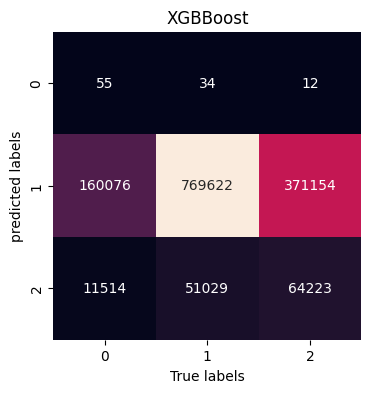

In [43]:
# Plot the confusion matrix
plot_cm(y_pred, y_test, "XGBBoost", 'cm_XGBBoost.pdf')

In [44]:
# Plot the ROC curve
plot_roc(y_test, lbm_clf, "roc_XGBBoost.pdf")

NameError: ignored

In [45]:
# Save the model
save_model(xgb_clf, "xgboost")

Model size: 11.78 MB


In [48]:
#logistic regression
model = LogisticRegression(
    max_iter=1000,  # increase the number of iterations
    n_jobs=-1       # use all processors
)
_ = model.fit(X_train, y_train)


In [49]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = model.predict(X_test)
results

,actual,predicted
1072707,2,1
3189947,1,1
2168027,1,1
1614923,1,1
3911542,2,1
...,...,...
1137006,2,1
4700662,1,1
3805720,0,1
3954897,0,1


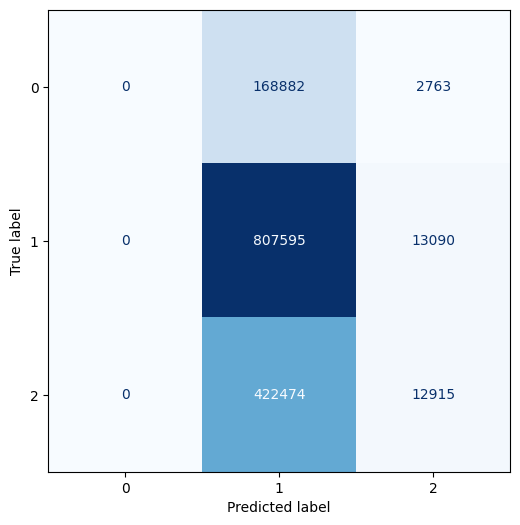

In [52]:
# display the confusion matrix
cm = confusion_matrix(results['actual'], results['predicted'])

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
    results['actual'], results['predicted'], display_labels=model.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [57]:
print(accuracy_score(y_train, model.predict(X_train)))


# Get classification report
class_report = classification_report(results['actual'], results['predicted'])

0.5746636040370517


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
